In [1]:
import pandas as pd
import requests
import json
import seaborn as sns
from pymongo import MongoClient
from pymongo import GEOSPHERE
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
import pandas as pd
from dotenv import load_dotenv
import os
from functools import reduce
import operator
import src.functions as ft
import src.geoqueries as geo
load_dotenv()

True

In [2]:
### FOURSQUARE
tok1 = os.getenv("tok1")
tok2 = os.getenv("tok2")

In [3]:
client = MongoClient("localhost:27017")
db = client.get_database("ironhack")


## Evaluating New York

In [4]:
coord = [40.743662, -73.984268]
topic = ["basketball", "vegan", "airport", "starbucks", "school", "club", "dog"]

In [5]:
for t in topic:
    geo.Geoquery(coord, t, tok1, tok2)

In [6]:
ny_venues = db.get_collection("ny_venues")

In [7]:
ny_coordinates = [-73.984268, 40.743662] 
distance = 2000
city = "ny"

<AxesSubplot:xlabel='place', ylabel='count'>

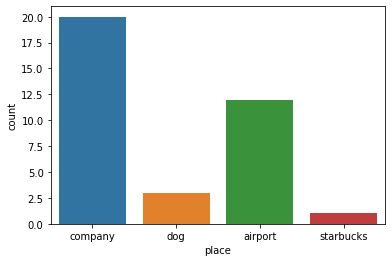

In [8]:
places = geo.creatingPlaces(ny_coordinates, distance, ny_venues, city)
places.place.value_counts()
sns.countplot(x='place', data=places)

In [9]:
geo.creatingMap(ny_coordinates, distance, ny_venues, city, coord)